In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
gammaData = pd.read_csv('GammaTelescopeData/magic04.csv')
gammaData.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
unique_classes = gammaData['class'].unique()
print("Unique class labels:", unique_classes)

Unique class labels: ['g' 'h']


In [ ]:
# Change 'g' to 0 and 'h' to 1 in the 'class' column
gammaData['class'] = gammaData['class'].replace({'g': 0, 'h': 1}).astype(int)

<ipython-input-32-058cab8e8ae9>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gammaData['class'] = gammaData['class'].replace({'g': 0, 'h': 1}).astype(int)


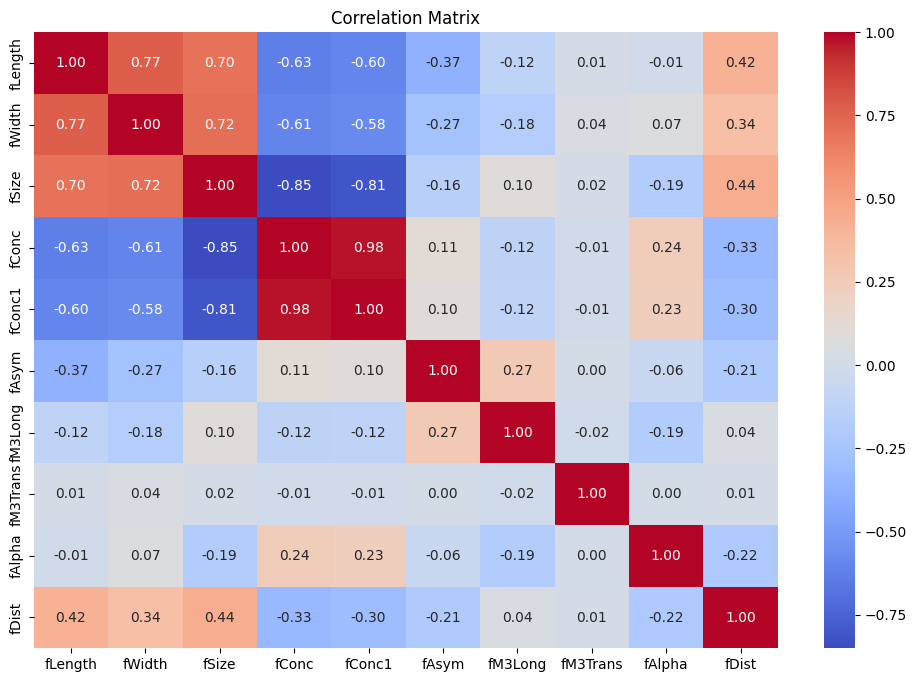

In [ ]:
# Drop the 'class' column for analysis
data_analysis = gammaData.drop('class', axis=1)

correlation_matrix = data_analysis.corr()
plt.figure(figsize=(12, 8))

# Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
gammaData = gammaData.drop('fConc1', axis=1)

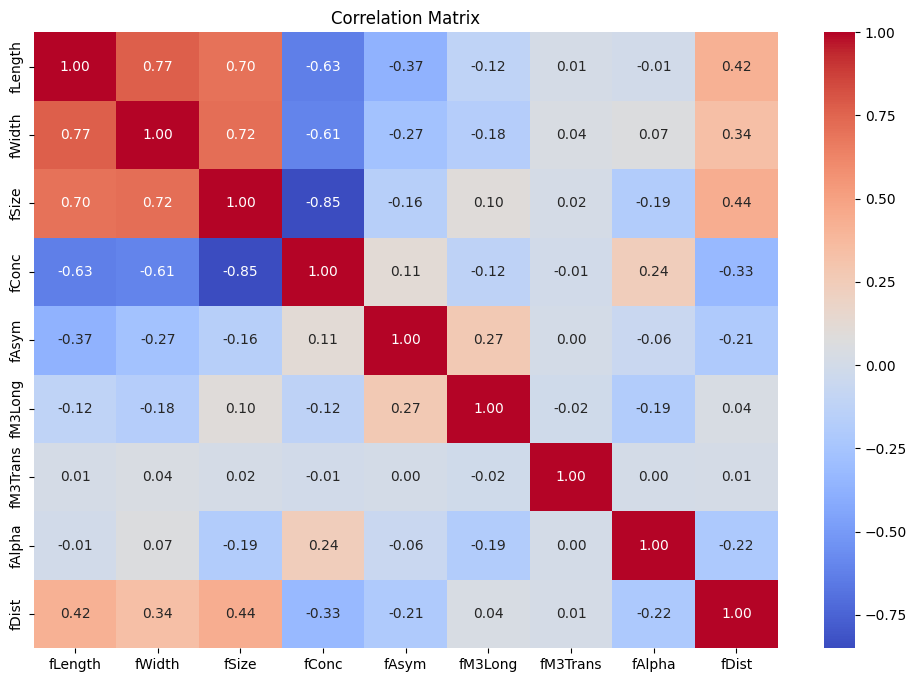

In [ ]:
# Drop the 'class' column for analysis
data_analysis = gammaData.drop('class', axis=1)

correlation_matrix = data_analysis.corr()
plt.figure(figsize=(12, 8))

# Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

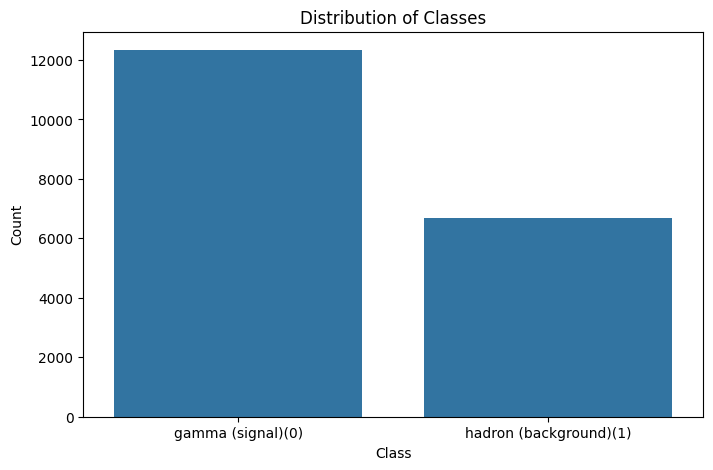


Class Percentages:
class
0    64.837014
1    35.162986
Name: count, dtype: float64


In [ ]:
class_counts = gammaData['class'].value_counts()

plt.figure(figsize=(8, 5))
sns.countplot(data=gammaData, x='class')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['gamma (signal)(0)', 'hadron (background)(1)'])
plt.show()

class_percentage = (class_counts / len(gammaData)) * 100
print("\nClass Percentages:")
print(class_percentage)

In [ ]:
gammaData.to_csv('GammaTelescopeData/gamma_dataset.csv', sep=',', index=False, encoding='utf-8')